In the first part of the project, we will be using the Bag-of-words model (Countvectorizer) in the data preprocessing phase. We'll also be using the news headlines i.e. title to predict the label in the first part of the project.
Dataset: https://www.kaggle.com/c/fake-news/data#

In [72]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

In [73]:
df = pd.read_csv('fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [74]:
df['title'] = df['title'].apply(lambda x: str(x).lower())
table = str.maketrans('', '', string.punctuation)
ps = PorterStemmer()
df['title'] = df['title'].apply(lambda s: ' '.join([ps.stem(word.translate(table)) for word in word_tokenize(str(s)) if word.isalpha() and word not in set(stopwords.words('english'))]))

In [75]:
df.drop(['author'],axis = 1, inplace = True)
df.dropna(inplace = True)
df.isnull().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, ngram_range = (1,3))
X = pd.DataFrame(cv.fit_transform(df['title']).toarray())
X.columns = cv.get_feature_names()
y=df['label']

In [77]:
X.shape

(20761, 5000)

In [78]:
y.shape

(20761,)

In [79]:
X.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,не,новое,новое восточное,новое восточное обозрение,обозрение,по,против,путин,россии,сша
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 0)

In [81]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### MultinomialNB Algorithm

accuracy: 0.911
Confusion matrix, without normalization


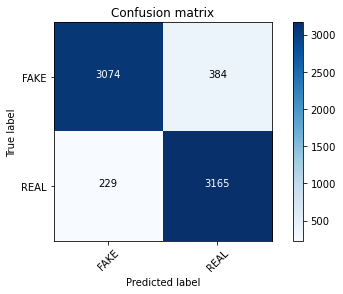

In [82]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['FAKE','REAL'])

#### Passive Aggresive Classifier Algorithm

accuracy: 0.921
Confusion matrix, without normalization


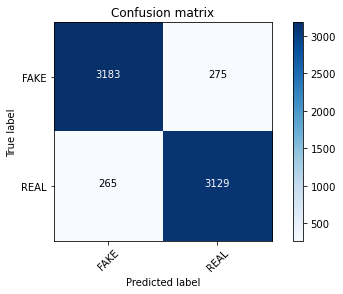

In [85]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(X_train, y_train)
y_predict = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_predict)
cm = metrics.confusion_matrix(y_test, y_predict)
print("accuracy: %0.3f" % score)
plot_confusion_matrix(cm, classes = ['FAKE','REAL'])

#### Multinomial Classifier with Hyperparameter

In [87]:
classifier = MultinomialNB(alpha = 0.1)
scores = []
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train, y_train)
    y_predict = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_predict)
    scores.append(score)
    if score == max(scores):
        classifier = sub_classifier
    print(f"Alpha: {alpha} Score: {score}")

/home/rishabhjain/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0 Score: 0.8968184471687098
Alpha: 0.1 Score: 0.9108289550496206
Alpha: 0.2 Score: 0.9112667834208991
Alpha: 0.30000000000000004 Score: 0.9118505545826037
Alpha: 0.4 Score: 0.9125802685347344
Alpha: 0.5 Score: 0.9124343257443083
Alpha: 0.6000000000000001 Score: 0.9127262113251605
Alpha: 0.7000000000000001 Score: 0.9118505545826037
Alpha: 0.8 Score: 0.9109748978400467
Alpha: 0.9 Score: 0.9105370694687682


In [93]:
classifier.get_params

<bound method BaseEstimator.get_params of MultinomialNB(alpha=0.6000000000000001)>

In [94]:
## Get feature names
feature_names = cv.get_feature_names()

In [100]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse = True)[:20]

[(-4.009136789007091, 'trump'),
 (-4.301651008180503, 'hillari'),
 (-4.353583756922147, 'clinton'),
 (-4.84520219361212, 'elect'),
 (-4.898909807127589, 'nan'),
 (-5.134878284670765, 'new'),
 (-5.251165433735565, 'video'),
 (-5.28925076775944, 'us'),
 (-5.349244765479689, 'fbi'),
 (-5.3827768257702635, 'war'),
 (-5.391338521905075, 'news'),
 (-5.395647016290798, 'comment'),
 (-5.435282323148194, 'email'),
 (-5.4488510523542635, 'hillari clinton'),
 (-5.4534151862472005, 'america'),
 (-5.495457809542752, 'russia'),
 (-5.544343398112275, 'world'),
 (-5.559487554276573, 'obama'),
 (-5.611691473576395, 'vote'),
 (-5.73108352003848, 'donald')]

In [104]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:200]

[(-11.35148438575563, 'abe'),
 (-11.35148438575563, 'abroad'),
 (-11.35148438575563, 'abus new'),
 (-11.35148438575563, 'abus new york'),
 (-11.35148438575563, 'act new'),
 (-11.35148438575563, 'act new york'),
 (-11.35148438575563, 'adopt'),
 (-11.35148438575563, 'advic'),
 (-11.35148438575563, 'advis new'),
 (-11.35148438575563, 'advis new york'),
 (-11.35148438575563, 'afford care'),
 (-11.35148438575563, 'afford care act'),
 (-11.35148438575563, 'aftermath'),
 (-11.35148438575563, 'age new'),
 (-11.35148438575563, 'age new york'),
 (-11.35148438575563, 'agenda breitbart'),
 (-11.35148438575563, 'aleppo new'),
 (-11.35148438575563, 'aleppo new york'),
 (-11.35148438575563, 'ali'),
 (-11.35148438575563, 'allegedli'),
 (-11.35148438575563, 'amazon'),
 (-11.35148438575563, 'america breitbart'),
 (-11.35148438575563, 'america new'),
 (-11.35148438575563, 'america new york'),
 (-11.35148438575563, 'american breitbart'),
 (-11.35148438575563, 'ami schumer'),
 (-11.35148438575563, 'amp'),
